In [79]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [80]:
name = "PID_tests/PID_tests_overshoot_1643975766.2487097"

time = np.load(f"{name}_times.npy")
overshoot_temp = np.load(f"{name}_temp.npy")
default_tune_temp = np.load(f"PID_tests/PID_tests_1643891639.1240058__temp.npy")
classicPID_temp = np.load(f"PID_tests/PID_tests_classicPID_1643893498.6087976_temp.npy")

assert len(time) == len(overshoot_temp)
assert len(time) == len(default_tune_temp)
assert len(time) == len(classicPID_temp)

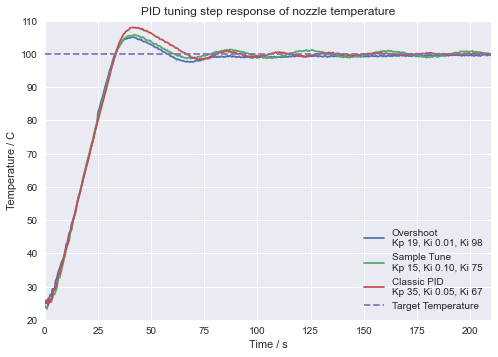

In [81]:
target_temp = 100

def plot_temps(xlims=[time[0], time[-1]], ylims=[20,110], legend=True):
  plt.plot(time, overshoot_temp, label="Overshoot\nKp 19, Ki 0.01, Ki 98")
  plt.plot(time, default_tune_temp, label="Sample Tune\nKp 15, Ki 0.10, Ki 75")
  plt.plot(time, classicPID_temp, label="Classic PID\nKp 35, Ki 0.05, Ki 67")
  plt.plot(time, [target_temp for _ in time], label="Target Temperature", linestyle='--')

  plt.xlabel("Time / s")
  plt.ylabel("Temperature / C")
  plt.title("PID tuning step response of nozzle temperature")
  plt.xlim(*xlims)
  plt.ylim(*ylims)
  legend and plt.legend()

plot_temps()
plt.savefig('./figures/PID_tuning_big.png')

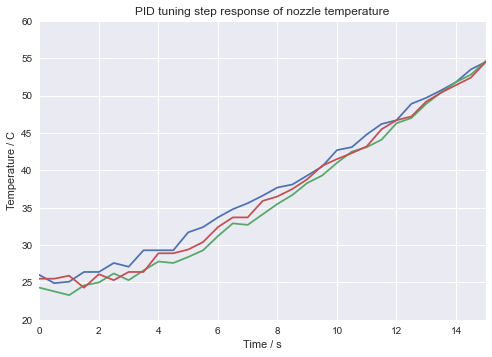

In [82]:
plot_temps(xlims=[0,15], ylims=[20,60], legend=False)
plt.savefig('./figures/PID_tuning_begin')

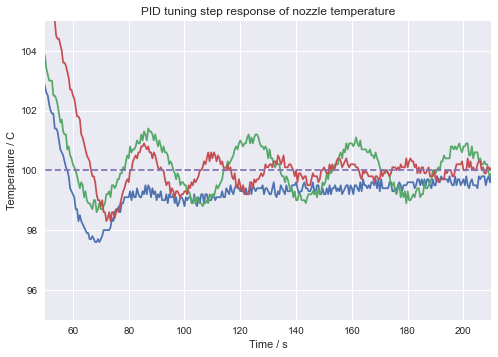

In [83]:
plot_temps(xlims=[50,210], ylims=[95,105], legend=False)
plt.savefig('./figures/PID_tuning_end.png')

Effects of varying Kp with the others being 0

In [84]:
kp100_temp = np.load('PID_tests/PID_tests_overshoot_1643975766.2487097_temp.npy')
kp10_temp = np.load('PID_tests/PID_tests_kp10_1643979504.6259186_temp.npy')
kp1_temp = np.load('PID_tests/PID_tests_kp1_1643983676.514616_temp.npy')

assert len(time) == len(kp100_temp)
assert len(time) == len(kp10_temp)
assert len(time) == len(kp1_temp)

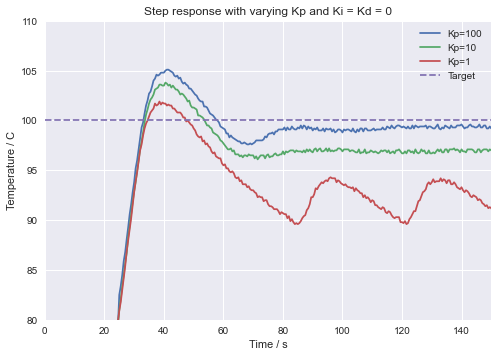

In [85]:
plt.plot(time, kp100_temp, label="Kp=100")
plt.plot(time, kp10_temp, label="Kp=10")
plt.plot(time, kp1_temp, label="Kp=1")
plt.plot(time, [target_temp for _ in time], label="Target", linestyle='--')

plt.xlim(0,150)
plt.ylim(80,110)
plt.legend()
plt.title("Step response with varying Kp and Ki = Kd = 0")
plt.xlabel("Time / s")
plt.ylabel("Temperature / C")
plt.savefig('./figures/Kp_variation.png')